In [ ]:
#Shoun Abraham
#Used code from https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
df= pd.read_csv('pca_results.csv', index_col = 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,Class
1,-2102.286221,32.931356,3.361919,-0.657775,-0.876986,0.560159,-0.189341,-0.166657,-0.265185,0.381197,1
2,2679.802949,-17.319784,-17.054354,1.179895,1.268521,-0.662220,0.024507,-0.396524,0.466224,1.076485,0
3,-1175.275741,14.440874,3.268932,0.562049,0.884034,0.656517,0.170322,0.688417,0.671184,0.577163,1
4,4610.783164,7.124193,-10.215333,-0.580810,1.235284,-0.819677,0.287341,0.731074,-1.062652,0.667411,1
5,1598.746935,17.200115,-1.985796,-0.818432,0.166598,-0.259442,1.215347,0.524174,-0.888239,0.443293,0


In [7]:
import numpy as np
from sklearn.cross_validation import train_test_split


In [12]:
cols = ["0", "1", "2", "3", "4", 
        "5", "6", "7", "8", "9"]
X = df[cols]
y = df['Class']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 19)
knn = KNeighborsClassifier(n_neighbors=19)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print('Accuracy of kNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of kNN classifier on test set: 0.70


In [52]:
#K Folds Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = KNeighborsClassifier(n_neighbors = 19)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.709


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  8  78]
 [ 11 203]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.42      0.09      0.15        86
          1       0.72      0.95      0.82       214

avg / total       0.64      0.70      0.63       300



In [49]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 19


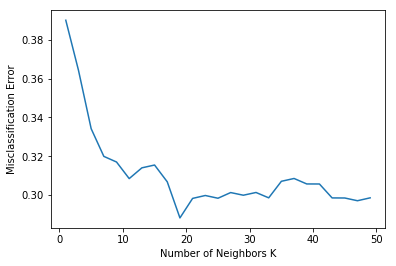

In [55]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

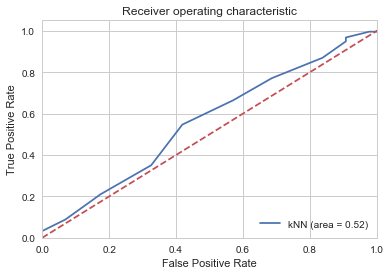

In [61]:
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='kNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('kNN_ROC')
plt.show()